# World Energy Analysis & Prediction

## World Energy Dataset

![World Petroleum Distribution](img/World map.png)
                                *The Petroleum Production Distribution around the world*

In this project, we are on to knowing the future trends of different types of Non-Renewable resources consumed and produced all over the world(among major locations. The first step involved grabbing the data. We managed to get a good decribing data from two major sites. One being knoema, which provides a fair distribution but with alot of missing values. And after few analysis we realised we need to hunt more data. This hunt ended with grabbing huge data from the British petroleum site. We managed to grab a continuous data of 52 years from there. 

So now we have the data distribution constituting following areas.  
    1. Petroleum Production              2. Petroleum Consumption
    3. Coal Production                   4. Coal Consumption
    5. Gas Production                    6. Gas Consumption
    7. Total Energy Production           8. Total Energy Consumption
    9. Electricity Production            10. Electricity Consumption

These data looks like below shown table for each of petroleum, coal & Gas.
![Oil](img/Oil.png)
![Coal](img/Coal.png)

Additionally we do managed to grab the data defining the prices & import/export which we would be using to predict even more interesting characteristics of the resources.
* Prices
* Reserves
* Trades(Imports/Exports)
* Carbon Dioxide Emissions

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import pandas as pd
import numpy as np
import matplotlib
import plotly.plotly as py
import cufflinks as cf

pd.options.display.mpl_style = 'default'
pd.set_option('display.max_columns', 500)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning:


mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.




# Primary Energy Consumption

### Importing dataset
The first step has to be involved with importing the dataset into the dataframes using the pandas library. For now we had two csv files grabbed which we will be described further.

In [2]:
Primary_Consumption = pd.read_csv('Primary Energy Consumption(Million tonnes oil equivalent).csv')
Primary_Consumption_by_fuel = pd.read_csv('Primary Energy_Consumption by fuel.csv')

**Dataset fields**
The dataset of primary consumption has double values defined for each year in Million tonnes from 1965 till 2016. Also we managed to have the Growth rate from 2005-2015 and also for 2016 which we are sure will help us to know the Growth rate trend of 2017 in the end.

In [3]:
Primary_Consumption.columns.values

array(['location', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016',
       'Growth rate per annum 2016', 'Growth rate per annum 2005-15',
       'Share 2016'], dtype=object)

In [4]:
Primary_Consumption.head()

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
0,US,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.004147,-0.003144,0.171183
1,Canada,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.003332,0.001571,0.024835
2,Mexico,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,-0.014853,0.011959,0.014050
3,Total North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477,-0.003993,-0.001651,0.210067
4,Argentina,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,-0.001167,0.025380,0.006693


**The Current trends of major resources** From Oil, Natural Gas and Coal to Nuclear Energy and Renewable Resources for the year 2015 & 2016 is what the second dataset holds. 

In [5]:
Primary_Consumption_by_fuel.head()

,location,Oil,NaturalGas,Coal,NuclearEnergy,Hydroelectric,Renewables,2015 Total,Oil.1,NaturalGas.1,Coal.1,NuclearEnergy.1,Hydroelectric.1,Renewables.1,2016 Total
0,US,856.454458,710.527450,391.824933,189.875234,55.766196,71.459367,2275.907715,863.122495,716.320328,358.430858,191.816279,59.229944,83.759773,2272.679688
1,Canada,99.149578,92.216250,19.645563,22.790049,85.446223,8.470104,327.717773,100.923971,89.867554,18.676923,23.210105,87.849349,9.182833,329.710724
2,Mexico,84.390180,78.409523,12.695654,2.619618,6.989969,3.718152,188.823105,82.840108,80.588534,9.814115,2.391088,6.777747,4.116475,186.528061
3,Total North America,1039.994217,881.153223,424.166150,215.284900,148.202388,83.647624,2792.448593,1046.886574,886.776416,386.921896,217.417472,153.857040,97.059080,2788.918472
4,Argentina,32.182147,43.367650,1.359770,1.617120,9.562588,0.624166,88.713440,31.905033,44.645544,1.057206,1.904967,8.682830,0.657107,88.852684


In [6]:
print(Primary_Consumption.shape)
print(Primary_Consumption_by_fuel.shape)

(80, 56)
(80, 15)


In [7]:
Primary_Consumption.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,157.637246,166.203055,172.437673,182.861807,195.430969,207.535109,213.067278,224.395263,237.163499,238.214106,239.229981,252.153115,260.953949,269.087605,278.561797,276.762457,275.243289,273.901168,278.104544,291.337702,272.727246,278.668313,288.489274,299.392928,305.849918,309.184124,311.504306,313.781207,315.622527,319.812476,326.222506,335.759250,339.375246,341.854623,348.016652,356.599420,360.897647,368.983292,382.681743,401.262390,415.403461,427.849491,441.516211,447.486952,440.563206,462.151225,472.985799,479.765904,488.582636,493.247296,497.658187,504.163541,0.014023,0.016269,0.037975
std,525.204050,553.292579,573.876381,608.155661,648.294737,685.791141,707.024094,743.966569,784.527168,786.193196,787.818725,829.660412,857.095523,881.488202,910.149960,902.245943,895.399553,888.908666,901.043421,942.806460,919.820089,938.135699,970.378754,1005.693917,1026.216461,1035.844400,1041.601827,1047.043647,1052.116733,1063.615776,1083.813702,1115.190591,1125.734087,1132.986515,1153.242195,1181.488700,1193.522067,1220.460050,1266.019431,1327.991936,1376.111291,1417.924632,1464.909241,1483.465502,1462.862188,1535.563661,1575.565774,1599.368928,1630.503864,1647.721333,1662.319318,1685.047154,0.032898,0.027541,0.126921
min,0.070472,0.075516,0.172000,0.554000,0.632110,0.872654,0.676000,1.098700,1.544000,1.356200,1.782000,1.292600,1.805900,1.729100,2.589000,3.095108,3.217074,3.575713,3.552335,3.849657,4.286840,4.684043,4.956948,5.344003,5.362816,5.533363,3.936000,5.973397,6.423689,6.998559,6.498704,7.409357,8.235451,8.387167,7.359278,6.510375,7.615605,8.117325,8.527946,8.627593,7.881914,7.567961,8.286438,8.243015,7.590145,5.600437,5.817418,5.841016,5.388728,5.187898,5.424212,5.489862,-0.107069,-0.047359,0.000414
25%,6.515783,6.837500,6.986989,7.547713,7.956423,8.145274,8.441234,8.451972,8.525162,9.302982,10.142675,10.454774,10.896268,11.601496,12.627077,13.739292,14.586936,15.596688,15.603871,16.179231,18.250098,18.849689,20.212848,20.740763,21.414611,22.119387,21.567604,20.495091,22.059800,22.795585,21.936072,23.840990,23.836481,24.033344,24.232101,24.799810,24.886961,24.800901,25.600413,27.203644,27.333544,28.366930,28.580727,29.961779,29.192164,30.950268,29.286374,29.514344,30.588831,30.987271,32.838728,33.158318,-0.003444,-0.004532,0.002498
50%,15.987840,16.649764,16.944233,18.292951,19.362800,21.358403,21.199056,21.351930,23.304248,23.980795,24.088495,25.974765,29.414004,31.400285,35.398015,36.011612,36.683875,38.872949,39.858020,40.177112,39.151373,44.094073,44.167035,45.946672,47.326000,49.019929,48.361550,48.804324,49.359339,50.848023,51.758640,51.328202,52.619724,54.782246,53.807678,50.907728,54.806081,54.834092,59.444196,63.296225,64.769813,66.179614,72.944503,76.312725,74.812606,79.695431,80.334834,83.448995,85.655980,80.885873,82.093071,84.494777,0.013589,0.011962,0.006364
75%,44.242584,45.266397,46.184369,49.810301,53.811414,59.068590,60.856435,69.302367,72.254612,71.179002,72.940066,78.674418,78.931487,85.497667,92.057825,94.135224,95.055146,98.264954,101.315318,108.023678,114.063901,118.252397,120.815256,125.786600,124.634819,113.359176,108.838942,1

In [8]:
Primary_Consumption_by_fuel.describe()

,Oil,NaturalGas,Coal,NuclearEnergy,Hydroelectric,Renewables,2015 Total,Oil.1,NaturalGas.1,Coal.1,NuclearEnergy.1,Hydroelectric.1,Renewables.1,2016 Total
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,162.785878,118.002984,141.924539,21.851867,33.120576,13.751615,491.437464,165.684287,120.155324,139.949945,22.202170,34.135893,15.733878,497.861506
std,533.137680,386.611335,559.239394,77.899034,111.943032,46.686682,1652.701670,543.095588,393.382898,553.789103,78.704690,115.607987,53.509314,1675.296909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.689444,6.559789,1.225983,0.000000,0.328701,0.186619,32.265143,10.885186,7.068800,1.043354,0.000000,0.391556,0.211789,32.907356
50%,29.053453,25.251290,6.722800,0.000000,3.330534,1.660873,81.536541,28.088538,25.616681,6.221174,0.000000,3.572030,1.712102,84.280308
75%,78.685040,45.383311,29.192997,5.276437,13.758275,4.344904,189.346943,78.677832,46.434705,32.302147,5.343961,13.845956,5.035599,186.919632
max,4340.956744,3146.746244,3784.654371,582.716448,883.215361,366.709746,13104.999050,4418.247654,3204.141977,3731.998524,592.057860,910.290485,419.570092,13276.306830


In [9]:
Primary_Consumption.dtypes

location                          object
1965                             float64
1966                             float64
1967                             float64
1968                             float64
1969                             float64
1970                             float64
1971                             float64
1972                             float64
1973                             float64
1974                             float64
1975                             float64
1976                             float64
1977                             float64
1978                             float64
1979                             float64
1980                             float64
1981                             float64
1982                             float64
1983                             float64
1984                             float64
1985                             float64
1986                             float64
1987                             float64
1988            

In [10]:
Primary_Consumption_by_fuel.dtypes

location            object
Oil                float64
NaturalGas         float64
Coal               float64
NuclearEnergy      float64
Hydroelectric      float64
Renewables         float64
2015 Total         float64
Oil.1              float64
NaturalGas.1       float64
Coal.1             float64
NuclearEnergy.1    float64
Hydroelectric.1    float64
Renewables.1       float64
2016 Total         float64
dtype: object

In [11]:
Primary_Consumption = Primary_Consumption.dropna(how='all')
Primary_Consumption = Primary_Consumption.dropna(axis=1, how='all')
Primary_Consumption_by_fuel = Primary_Consumption_by_fuel.dropna(how='all')
Primary_Consumption_by_fuel = Primary_Consumption_by_fuel.dropna(axis=1, how='all')
# Primary_Consumption = Primary_Consumption.fillna(0)
# Primary_Consumption.describe()

**Handling missing** Now as we see a number of locations dont have any data for few years. Maybe they werent recorded for those years, or maybe they would have been zero for that period. These missing values cant be assumed to be the average as it is the energy cosumption which changes from places to place. A step to cancel out those rows will be taken ahead in the notebook but for now we would be considering those values as NaN.

In [12]:
print(Primary_Consumption.isnull().sum())

location                         0
1965                             9
1966                             9
1967                             9
1968                             9
1969                             9
1970                             9
1971                             8
1972                             8
1973                             8
1974                             8
1975                             8
1976                             8
1977                             8
1978                             8
1979                             8
1980                             8
1981                             8
1982                             8
1983                             8
1984                             8
1985                             1
1986                             1
1987                             1
1988                             1
1989                             1
1990                             1
1991                             1
1992                

In [13]:
print(Primary_Consumption_by_fuel.isnull().sum())

location           0
Oil                0
NaturalGas         0
Coal               0
NuclearEnergy      0
Hydroelectric      0
Renewables         0
2015 Total         0
Oil.1              0
NaturalGas.1       0
Coal.1             0
NuclearEnergy.1    0
Hydroelectric.1    0
Renewables.1       0
2016 Total         0
dtype: int64


**Data Analysis** The common feature and how these constitutes in our data can be seen here by the scatter plot. This scatter plot defines the extent of Growth rate from 2005-2015 compared with 1965 and 2016. We dont see any linear relation among them but we could imply the how it increases from those years.

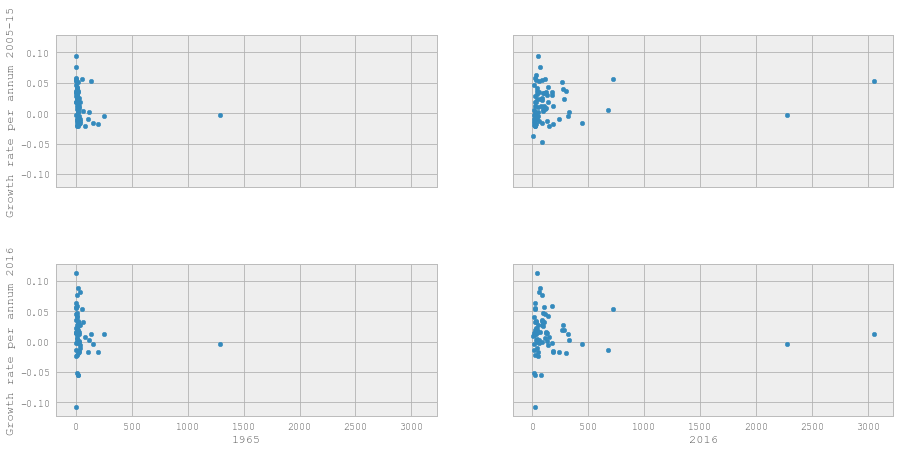

In [14]:
Primary_Consumption_Countries = Primary_Consumption[Primary_Consumption.location.str.startswith('Total') == False]
figure,axs = plt.subplots(2, 2,sharey=True,sharex=True,figsize=(15,7))
Primary_Consumption_Countries.plot(kind='scatter',x='1965',y='Growth rate per annum 2005-15',ax=axs[0][0])
Primary_Consumption_Countries.plot(kind='scatter',x='2016',y='Growth rate per annum 2005-15',ax=axs[0][1])
Primary_Consumption_Countries.plot(kind='scatter',x='1965',y='Growth rate per annum 2016',ax=axs[1][0])
Primary_Consumption_Countries.plot(kind='scatter',x='2016',y='Growth rate per annum 2016',ax=axs[1][1])

In [15]:
#growthscatter = 'ScatterPlots.jpeg'
#figure.savefig(growthscatter)

In [16]:
x = Primary_Consumption_by_fuel[Primary_Consumption_by_fuel.location.str.startswith(('Total'))]
x = x.drop(x.index[6])
x['location'] = x['location'].map({'Total North America': 'North America', 'Total S. & Cent. America': 'South America', 'Total Europe & Eurasia': 'Europe','Total Middle East': 'Middle East','Total Africa': 'Africa','Total Asia Pacific': 'Asia Pacific'})
x

,location,Oil,NaturalGas,Coal,NuclearEnergy,Hydroelectric,Renewables,2015 Total,Oil.1,NaturalGas.1,Coal.1,NuclearEnergy.1,Hydroelectric.1,Renewables.1,2016 Total
3,North America,1039.994217,881.153223,424.166150,215.284900,148.202388,83.647624,2792.448593,1046.886574,886.776416,386.921896,217.417472,153.857040,97.059080,2788.918472
13,South America,334.438990,158.251422,35.877106,4.951091,152.863036,24.018242,710.399884,326.248687,154.727110,34.658705,5.497651,156.013926,28.193503,705.339589
47,Europe,865.860059,909.202929,471.338899,263.949783,194.674535,141.584645,2846.610901,884.625407,926.945089,451.564172,258.197467,201.767888,144.045064,2867.145071
55,Middle East,412.799005,444.282746,10.222104,0.802598,5.921318,0.523698,874.551478,417.835509,461.099137,9.271668,1.410925,4.719066,0.745601,895.081907
60,Africa,182.093247,122.238483,95.315656,2.768928,26.903901,4.229425,433.549654,185.395006,124.343377,95.949029,3.600814,25.823986,5.024011,440.136219
78,Asia Pacific,1505.771226,631.617440,2747.734456,94.959149,354.650183,112.706113,5447.438537,1557.256472,650.250848,2753.633055,105.933530,368.108580,144.502832,5579.685574


**Bar plots**
This bar plot gives a clear description of Oil, Natural Gas and Coal with distributiob among the 6 major continents(Antarctica not included for obvious reasons).

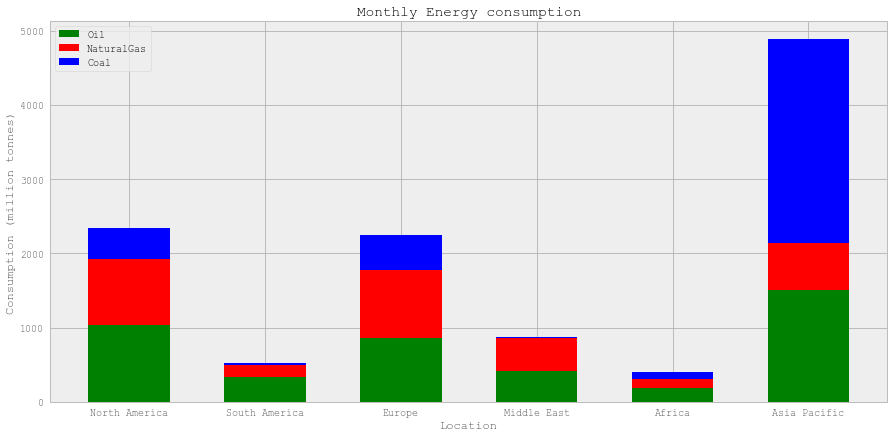

In [17]:
location = np.arange(len(x)) 
plt.figure(figsize=(15,7))
b1 = plt.bar(location, x['Oil'], width = 0.6, color='g')
b2 = plt.bar(location, x['NaturalGas'], bottom=x['Oil'], width = 0.6, color='r')
b3 = plt.bar(location, x['Coal'], bottom=x['Oil']+x['NaturalGas'], width = 0.6, color='b')

plt.xticks(location, x['location'])
plt.title('Monthly Energy consumption')
plt.xlabel('Location')
plt.ylabel('Consumption (million tonnes)')
plt.legend( (b1, b2, b3), ('Oil', 'NaturalGas', 'Coal') )

**Analysis Report**
This above graph gives us the more required observations. The first being Asia bein ght elargest continent are also the highest to utlizing the Coal and Oil compared to others. Middle East known to have the highest production do not really have much contribution in its consumption.

In [18]:
y = Primary_Consumption[Primary_Consumption.location.str.startswith(('Total'))]
y = y.drop(y.index[6])
y = y.drop('Growth rate per annum 2016', 1)
y = y.drop('Growth rate per annum 2005-15', 1)
y = y.drop('Share 2016', 1)
y['location'] = y['location'].map({'Total North America': 'North America', 'Total S. & Cent. America': 'South America', 'Total Europe & Eurasia': 'Europe','Total Middle East': 'Middle East','Total Africa': 'Africa','Total Asia Pacific': 'Asia Pacific'})
y

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477
13,South America,108.841288,115.739168,120.422511,127.698869,134.183105,141.903398,156.842776,168.977711,185.208726,193.518663,196.094628,209.149839,221.117159,234.132544,249.880689,263.590006,263.025790,264.787659,266.923958,277.257116,283.623533,304.252129,315.911170,324.582764,331.377291,331.462563,340.823623,355.876539,368.478260,390.529946,407.393804,423.655246,448.084005,463.768203,465.971516,476.309350,479.456037,486.095692,492.942453,518.583418,537.167937,567.849041,593.906470,613.227473,606.004206,641.698984,665.352905,680.945141,696.730729,704.135248,710.399887,705.339582
47,Europe,1643.912683,1712.276318,1775.362585,1873.850310,1993.175579,2111.193699,2184.359700,2289.982552,2416.966944,2443.127916,2471.714550,2596.162594,2665.528761,2759.224611,2853.773047,2834.490298,2814.541082,2813.216884,2854.307676,2940.669707,3033.938637,3091.195962,3165.845144,3210.131414,3206.396506,3199.426833,3150.659488,3044.576584,2924.715778,2801.509242,2783.485841,2807.442124,2766.359870,2780.335307,2779.705102,2813.784388,2857.867993,2852.719599,2909.782258,2952.952435,2965.202133,3023.485791,3017.729640,3022.168744,2839.815773,2952.642584,2937.881915,2936.285536,2900.594357,2838.318241,2846.610850,2867.145087
55,Middle East,48.288251,50.030702,52.260252,54.839464,57.622116,61.789625,65.317314,70.808907,77.853681,82.890912,82.855469,93.634539,106.322497,115.077108,135.295422,129.565787,140.947365,155.742308,168.790492,190.827554,202.683552,212.628951,224.734927,239.247367,253.100280,264.204606,280.266151,301.445987,303.224062,338.422461,350.685692,363.737161,376.004008,395.440800,408.067302,423.383461,449.955084,469.064345,488.958348,527.536248,564.663076,592.199136,625.578807,667.616168,690.319411,734.231930,750.302104,780.817012,812.420842,840.017405,874.551468,895.081906
60,Africa,60.231859,62.915862,63.570315,67.021434,68.539199,74.471772,80.646252,85.756751,92.253022,96.956619,102.804574,112.275245,117.792530,122.194091,133.335841,144.597690,161.113010,172.409623,177.370854,183.475821,190.094041,195.201070,200.978990,215.839027,216.323408,222.310860,221.539508,225.688276,227.364127,233.998281,243.975795,250.608128,255.590441,259.913428,267.474366,273.565554,284.281825,286.820928,300.907455,324.142864,327.372070,334.760442,347.936557,369.499341,373.429310,388.890963,387.988651,402.895684,415.379927,427.921218,433.549642,440.136223
78,Asia Pacific,442.210356,483.533603,507.043633,545.216791,621.232895,705.669041,771.609525,817.890489,884.918284,901.817921,935.006036,981.868681,1036.092246,1101.627364,1152.333911,1163.931595,1170.461638,1181.500691,1235.038150,1319.726903,1385.909356,1446.408825,1529.017426,1638.748764,1729.549961,1800.923154,1883.934166,1969.666682,2073.099057,2187.630751,2287.480095,2392.992502,2464.298715,2461.168310,2555.323031,2648.074579,2737.034819,2879.764780,3124.842481,3426.048332,3705.574072,3924.332313,4174.973769,4292.106487,4402.235990,4674.723618,4935.133378,5108.578805,5245.005462,5357.242442,5447.438566,5579.685316


**Area Chart** Above few of the fields have been removed which would provide us with better understanding of the distribution. Th fields removed are like the Growth rate & shared, which are not of importance unless we move to the prediction models.

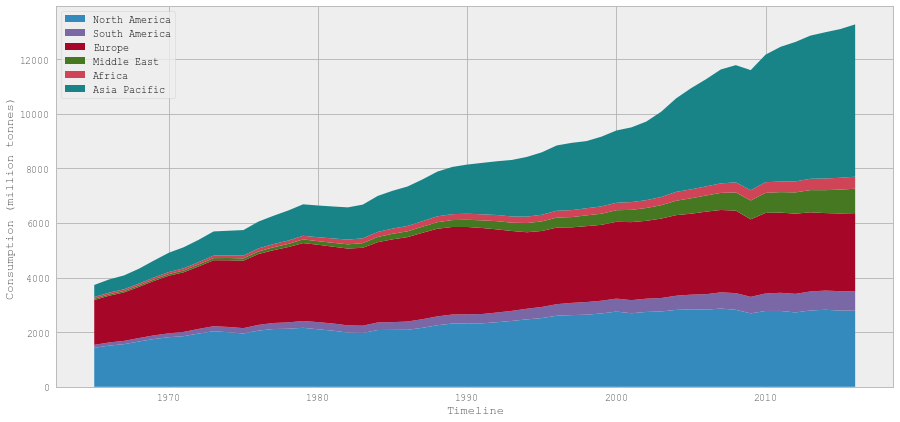

In [19]:
temp = y.drop('location', 1)
i = list(temp.columns.values)
j = temp.values.tolist()
i = [int(x) if type(x) is str else None for x in i]
i
plt.figure(figsize=(15,7))
plt.stackplot(i,j, labels=['North America','South America','Europe','Middle East','Africa','Asia Pacific'])
plt.xlabel('Timeline')
plt.ylabel('Consumption (million tonnes)')
plt.legend(loc='upper left')

**Analysis Report** This area chart has crazy trends in the form of timeline from 1965 till 2016. The consumption rate of North America does not looks like has changed much but then there is Asia having the increase in cosumption exponentially. 

# Major Resources
We would be holding ourselves to three major resources, after depleting of whose would affect the world as whole. These 3 resources are the Oil, Coal and Natural Gas.

# Oil

An analysis similar to the Primary Consumption discussed above will be followed to get an overall ditribution analysis of the data.

In [20]:
Oil_Production = pd.read_csv('Oil Production.csv')
Oil_Consumption = pd.read_csv('Oil Consumption.csv')

In [21]:
Oil_Production.head()
Oil_Consumption.head()

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
0,US,11522.187700,12100.347310,12566.880470,13404.548550,14152.985100,14709.910250,15222.758080,16380.813850,17317.932770,16630.648000,16333.560880,17460.744540,18443.366770,18755.940660,18438.211150,17062.354840,16059.695340,15294.962680,15234.540300,15725.358930,15726.130990,16280.893620,16664.669120,17283.250130,17325.233210,16988.182360,16713.443070,17032.782700,17236.230990,17718.647510,17724.819780,18309.358200,18620.574110,18917.187920,19518.901780,19701.368200,19648.619730,19760.904850,20033.040080,20731.543720,20802.160380,20687.419180,20680.383560,19490.413730,18771.397260,19180.128770,18882.073970,18490.215850,18961.126030,19105.613700,19530.909590,19631.237700,0.005137,-0.006286,0.203311
1,Canada,1108.116301,1167.468795,1245.557068,1322.157350,1380.190329,1471.579753,1512.128247,1588.909235,1682.379178,1712.654082,1682.419918,1788.929071,1811.693233,1849.044740,1931.127589,1898.032459,1788.171096,1608.545370,1518.124740,1539.787814,1556.131534,1559.479068,1627.213151,1709.773770,1770.719342,1747.306356,1659.168493,1688.913716,1697.295781,1726.135370,1848.248824,1889.218279,1968.884379,2002.267713,2061.212959,2042.706382,2093.870156,2172.313143,2233.092532,2308.590912,2277.951462,2275.271400,2341.592646,2295.245291,2172.696029,2304.666959,2380.131850,2340.359405,2382.873553,2372.059325,2298.822354,2343.250478,0.019326,0.000912,0.024268
2,Mexico,296.359178,309.135808,331.272712,361.475164,382.527397,411.544493,433.790000,480.655628,514.709562,588.552466,662.932247,729.987514,755.129781,874.011973,950.608671,1047.689978,1172.345041,1227.547164,1202.503219,1279.507617,1344.578274,1370.670110,1421.087603,1406.802678,1502.642630,1580.449890,1660.372712,1683.321339,1687.201890,1821.147041,1690.113616,1720.385219,1770.207288,1868.465589,1886.963315,1965.190574,1938.725425,1863.989096,1909.165753,1982.698112,2029.582695,2019.143479,2067.333590,2054.216387,1996.186177,2014.385577,2043.146027,2063.279909,2020.453807,1942.916606,1923.424413,1868.743819,-0.028429,-0.005358,0.019354
3,Total North America,12926.663180,13576.951920,14143.710250,15088.181070,15915.702820,16593.034490,17168.676330,18450.378720,19515.021510,18931.854550,18678.913040,19979.661120,21010.189780,21478.997370,21319.947410,20008.077270,19020.211480,18131.055220,17955.168260,18544.654370,18626.840800,19211.042790,19712.969880,20399.826580,20598.595180,20315.938600,20032.984270,20405.017760,20620.728660,21265.929920,21263.182220,21918.961690,22359.665770,22787.921220,23467.078060,23709.265150,23681.215310,23797.207090,24175.298370,25022.832740,25109.694540,24981.834060,25089.309800,23839.875410,22940.279470,23499.181300,23305.351850,22893.855160,23364.453390,23420.589630,23753.156360,23843.232000,0.003792,-0.005538,0.246932
4,Argentina,432.373936,447.270806,459.876977,468.994810,491.750733,447.785768,479.603260,478.584153,482.634685,482.874384,457.946164,472.729372,497.940520,499.883589,528.458877,490.152350,458.282712,441.008055,450.822603,426.955082,388.977918,448.480548,476.706384,474.912978,434.874247,412.272986,425.930904,448.930738,446.816027,432.966301,431.509507,447.431120,450.262877,459.019589,430.612849,431.644399,426.551836,394.922301,406.870904,427.080956,451.229130,473.851786,527.752544,540.092111,532.222891,593.686424,608.779290,635.630733,682.954995,674.356873,692.198337,687.315939,-0.007053,0.043718,0.007118


In [22]:
print(Oil_Production.shape)
print(Oil_Consumption.shape)

(62, 56)
(80, 56)


In [23]:
Oil_Production.describe()
Oil_Consumption.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1297.913738,1398.076057,1497.818001,1621.108923,1762.472629,1912.081989,1998.186287,2144.874461,2317.994782,2285.285523,2266.781372,2408.259468,2498.256161,2621.075200,2668.695635,2559.821770,2481.266217,2413.549290,2407.124367,2459.617642,2256.509755,2325.534569,2376.861285,2451.868185,2500.269348,2531.004537,2538.336207,2577.853890,2567.449147,2628.096035,2670.827141,2726.282603,2804.673476,2828.512887,2896.113422,2922.014311,2956.857220,2991.518925,3058.839798,3165.194593,3215.625540,3257.358905,3309.927357,3287.757681,3254.074488,3369.179225,3407.448895,3443.368937,3497.986010,3532.584074,3607.699736,3666.754439,0.016889,0.012159,0.037975
std,4300.932782,4615.932386,4928.138237,5323.683932,5770.505123,6236.407843,6542.173918,7023.222974,7569.022126,7443.259292,7376.825216,7831.209898,8121.337218,8496.488352,8617.993239,8246.845704,7967.735038,7729.359772,7694.875016,7857.479308,7535.143318,7765.209380,7927.919785,8169.216232,8312.821026,8393.926682,8399.024171,8514.907796,8468.373006,8655.303717,8783.498693,8971.175779,9219.867984,9293.236738,9520.766442,9607.894363,9708.117489,9818.993489,10041.014131,10391.671758,10538.604552,10663.629875,10823.007702,10706.702567,10580.024570,10959.454278,11078.261689,11187.512968,11369.716729,11485.995156,11746.731836,11947.603817,0.036319,0.029171,0.123735
min,1.012521,1.009945,1.535918,1.966913,2.218687,1.955425,1.890329,2.243579,2.913041,3.989781,4.759151,6.551639,8.610740,8.488000,9.179178,16.873689,18.445123,27.184685,29.681260,27.540601,28.979863,30.977562,21.457014,19.839727,17.693507,25.361808,24.080110,33.183415,29.058877,22.630000,25.680630,29.294481,18.489781,20.994795,35.235479,35.082115,32.878332,36.586775,35.094019,38.206355,34.514299,37.703181,42.515079,45.140505,43.523181,45.034342,42.244564,40.429423,45.452353,41.796181,45.417436,43.626950,-0.059712,-0.057231,0.000452
25%,71.672869,80.093269,89.901656,97.021995,95.982104,106.620093,109.175256,119.364374,123.209448,130.001680,134.289106,140.304216,140.920057,152.615634,163.737400,166.682494,176.870694,182.729246,184.840860,179.346782,177.461110,183.977645,190.383710,193.875377,193.059794,198.735781,186.889274,186.047418,193.515157,200.173183,204.582384,204.098224,199.791192,205.936795,193.877192,199.290287,206.905466,217.667192,224.455507,222.906899,227.016783,226.270178,235.907323,234.383108,221.912692,228.435703,241.362263,236.731462,247.038086,231.747953,242.117502,240.441116,-0.001772,-0.009541,0.002490
50%,121.970959,134.503014,141.249452,159.510601,184.592603,196.919277,204.277493,220.763866,237.324616,244.024123,260.761671,275.340419,311.580142,334.635432,350.638219,355.504085,324.455548,324.760356,332.675644,333.182104,358.865452,384.110931,371.788219,364.394066,367.001480,423.961812,425.930904,414.881147,381.635507,398.982274,403.835250,403.330710,432.108849,443.457198,449.507534,431.644399,426.551836,429.600027,454.170658,485.673333,501.870301,527.556247,539.221533,549.227869,548.734110,593.686424,608.779290,621.914590,636.363014,634.753205,648.276683,611.195878,0.018209,0.010635,0.006330
75%,404.100599,427.001899,433.763749,462.821435,4

In [24]:
Oil_Production = Oil_Production.dropna(how='all')
Oil_Production = Oil_Production.dropna(axis=1, how='all')
Oil_Consumption = Oil_Consumption.dropna(how='all')
Oil_Consumption = Oil_Consumption.dropna(axis=1, how='all')
# Oil_Production = Oil_Production.fillna(0)

In [25]:
print(Oil_Production.isnull().sum(),Oil_Consumption.isnull().sum())

location                          0
1965                             17
1966                             16
1967                             15
1968                             14
1969                             14
1970                             14
1971                             13
1972                             12
1973                             12
1974                             12
1975                             12
1976                             12
1977                             12
1978                             12
1979                             12
1980                             12
1981                             11
1982                             11
1983                             11
1984                             11
1985                              7
1986                              6
1987                              5
1988                              5
1989                              5
1990                              5
1991                        

In [26]:
op = Oil_Production[Oil_Production.location.str.startswith(('Total'))]
op = op.drop(op.index[6])
op = op.drop('Growth rate per annum 2016', 1)
op = op.drop('Growth rate per annum 2005-15', 1)
op = op.drop('Share 2016', 1)
op['location'] = op['location'].map({'Total North America': 'North America', 'Total S. & Cent. America': 'South America', 'Total Europe & Eurasia': 'Europe','Total Middle East': 'Middle East','Total Africa': 'Africa','Total Asia Pacific': 'Asia Pacific'})
op

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,North America,10296.148000,10961.241000,11736.252000,12232.743000,12594.674000,13256.849000,13223.778000,13519.896000,13584.953000,13107.205000,12548.737000,12227.639000,12555.562000,13198.441000,13577.534000,14062.626000,14343.573000,14789.534000,14837.668000,15225.951000,15305.173210,14794.259460,14731.747950,14644.107510,14017.533230,13822.819600,14158.681770,14031.977090,13887.020200,13805.869410,13778.534900,14044.501450,14264.808400,14181.769960,13687.547910,13890.951510,13965.487170,14075.890430,14165.470380,14160.056780,13706.338830,13722.373940,13628.406050,13156.321010,13443.926490,13840.657280,14317.008450,15545.046660,16947.740700,18833.275780,19732.791070,19269.836040
12,South America,4333.808493,4291.275205,4570.845479,4681.729781,4702.336712,4829.092401,4722.767741,4494.539296,4792.360725,4368.745801,3697.385785,3658.998515,3639.448684,3647.902508,3902.182494,3746.544231,3725.050680,3571.374454,3538.510416,3719.421278,3720.914598,3984.312315,3928.835997,4111.800136,4166.670388,4507.201618,4749.151211,4845.493880,5043.794712,5345.692603,5779.218685,6159.954809,6494.567082,6875.387822,6654.778731,6696.411814,6821.879532,6763.498740,6720.363958,7185.250740,7341.181333,7498.442155,7333.640207,7429.697139,7384.496018,7404.098518,7436.227196,7375.580562,7407.041873,7658.504884,7761.262222,7473.636633
25,Europe,5643.513973,6100.372581,6586.236230,7000.759820,7412.787236,7974.185986,8451.552518,8935.249667,9544.678964,10158.543750,10987.755610,11838.270300,12926.935550,13836.912540,14653.485570,15096.375840,15409.886660,15847.937240,16358.834030,16575.807980,16435.570490,16923.059240,17212.271840,17102.630630,16693.025920,16073.755450,15220.486940,14209.833230,13536.531260,13645.594340,13811.305270,13994.844340,14216.778350,14186.261040,14465.096360,14989.308570,15498.656700,16310.964800,16991.684900,17560.561820,17515.584440,17582.238220,17794.585890,17573.903600,17753.518200,17694.168880,17387.203840,17126.542060,17174.409960,17206.206400,17479.299970,17716.132040
36,Middle East,8386.996164,9360.761096,10013.977530,11257.969400,12390.958900,13904.219010,16352.638400,18185.682140,21197.130070,21894.115450,19732.871530,22352.191600,22529.604440,21473.085410,22020.545220,18882.407960,16180.345420,13472.841700,11841.121930,11300.709390,10645.396190,13145.894360,13219.146550,15233.925330,16425.223490,17540.238210,17286.854930,18735.176040,19591.337620,20117.638270,20226.012510,20689.064320,21730.323930,22955.032860,22341.328540,23717.167660,23209.126410,21991.259930,23582.150120,24882.482030,25548.584610,25764.663870,25347.609420,26429.732420,24764.528880,25821.824490,28136.065650,28517.692120,28213.032520,28514.760730,30065.195930,31788.599900
50,Africa,2239.535397,2847.672849,3142.733288,4016.896612,5094.418630,6111.896137,5700.512247,5722.468333,5984.287288,5507.592274,5046.908740,5997.392896,6316.004740,6206.672110,6793.131973,6224.899754,4981.098274,4813.825836,4865.266877,5178.616858,5432.749041,5443.221699,5451.912384,5750.885656,6216.616986,6730.501068,6886.349671,7009.550902,6970.258849,7009.999562,7118.243014,7447.143115,7778.260466,7647.805808,7590.224712,7771.081610,7863.733436,7965.271930,8450.613908,9375.491734,9815.720178,10013.693320,10267.765870,10218.174830,9837.916713,10064.726890,8464.250547,9246.537823,8611.771332,8306.653750,8296.776420,7891.588147
60,Asia Pacific,898.587836,1002.149616,1062.737288,1239.768825,1431.710658,1979.495096,2387.084247,2803.637896,3356.158055,3578.185242,3807.989578,4334.714334,4747.948548,4975.206729,5112.955567,4945.439356,4906.707930,4816.360242,5173.004250,5690.492598,5915.887089,6137.742070,6194.809966,6260.750858,6477.330288,6709.615460,6899.924564,6879.747862,6947.319895,7139.208989,7269.756015,7500.5

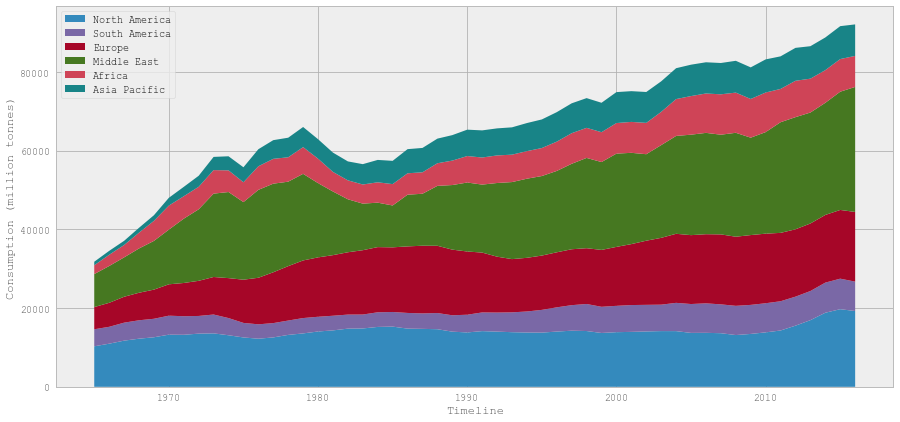

In [27]:
temp_op = op.drop('location', 1)
i_op = list(temp_op.columns.values)
j_op = temp_op.values.tolist()
i_op = [int(x) if type(x) is str else None for x in i_op]
i_op
plt.figure(figsize=(15,7))
plt.stackplot(i_op,j_op, labels=['North America','South America','Europe','Middle East','Africa','Asia Pacific'])
plt.xlabel('Timeline')
plt.ylabel('Consumption (million tonnes)')
plt.legend(loc='upper left')

In [28]:
oc = Oil_Consumption[Oil_Consumption.location.str.startswith(('Total'))]
oc = oc.drop(oc.index[6])
oc = oc.drop('Growth rate per annum 2016', 1)
oc = oc.drop('Growth rate per annum 2005-15', 1)
oc = oc.drop('Share 2016', 1)
oc['location'] = oc['location'].map({'Total North America': 'North America', 'Total S. & Cent. America': 'South America', 'Total Europe & Eurasia': 'Europe','Total Middle East': 'Middle East','Total Africa': 'Africa','Total Asia Pacific': 'Asia Pacific'})
oc

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
3,North America,12926.663180,13576.951920,14143.710250,15088.181070,15915.702820,16593.034490,17168.676330,18450.378720,19515.021510,18931.854550,18678.913040,19979.661120,21010.189780,21478.997370,21319.947410,20008.07727,19020.211480,18131.055220,17955.168260,18544.654370,18626.840800,19211.042790,19712.969880,20399.826580,20598.595180,20315.938600,20032.984270,20405.017760,20620.728660,21265.929920,21263.182220,21918.961690,22359.665770,22787.921220,23467.078060,23709.265150,23681.215310,23797.207090,24175.298370,25022.832740,25109.694540,24981.834060,25089.309800,23839.875410,22940.279470,23499.181300,23305.351850,22893.855160,23364.453390,23420.589630,23753.156360,23843.232000
13,South America,1613.194564,1713.360134,1771.652144,1893.424552,1997.446480,2084.518135,2345.929983,2516.791138,2759.318909,2836.551240,2827.674610,2965.421793,3095.448499,3259.963752,3424.958800,3537.66080,3514.787450,3437.462618,3342.115144,3337.945663,3322.568121,3573.778613,3683.512333,3725.292052,3768.245419,3735.109020,3775.638270,3989.116482,4074.526958,4312.075624,4462.361176,4556.471185,4817.393611,5005.561477,5078.265916,4996.762482,5099.047958,5103.331054,4999.756584,5194.887095,5373.016502,5553.570009,5831.395381,6099.620512,6093.814956,6424.393747,6665.695850,6825.702291,7073.337397,7170.843531,7139.352596,6976.066624
47,Europe,11524.374660,12577.460650,13675.199430,14862.130340,16410.839460,18155.249010,19131.086430,20506.275800,22071.369880,21735.822850,21578.810530,22682.896340,22935.612740,24226.550120,24734.783430,23983.23262,23104.022170,22401.106850,22045.026640,22098.245290,22147.319240,22725.460920,22875.270730,22954.481360,22979.155230,23142.917310,22792.263730,22115.627880,20589.446950,19891.463420,19696.146140,19442.300790,19595.618930,19754.861040,19659.885620,19442.896030,19769.036180,19660.626340,19948.226790,20063.928600,20229.235300,20452.113320,20202.222140,20110.293410,19299.778880,19244.311210,19063.822820,18594.156710,18370.272770,18287.106260,18450.023940,18793.261350
55,Middle East,881.399904,906.593057,936.220859,965.222169,1000.214377,1050.814954,1106.015940,1185.047295,1282.790084,1368.852541,1327.488176,1509.092969,1712.687710,1864.153660,2115.386994,1994.12458,2175.317664,2382.999523,2634.747289,2865.235420,3044.181126,3048.331068,3214.199235,3357.876733,3491.533692,3598.930324,3783.961261,3934.922572,4105.831773,4513.007429,4524.659816,4577.369868,4699.024682,4886.665551,5011.329642,5161.265223,5400.600781,5538.196109,5746.470009,6049.944408,6509.723459,6725.614828,6949.376809,7418.310334,7778.548325,8101.701937,8381.726083,8759.980305,8949.727304,9180.249899,9300.316747,9431.232226
60,Africa,548.330320,599.934975,598.411549,629.831870,645.737074,714.044945,801.763008,868.516825,934.847828,967.484150,1015.312353,1133.667538,1196.939596,1258.162615,1335.498016,1422.46238,1509.854369,1588.903808,1643.011304,1677.409377,1722.599044,1698.171093,1786.411748,1872.095708,1941.977816,1984.689847,1987.581891,2021.157452,2057.520810,2108.827625,2185.256344,2232.307547,2307.425468,2368.775199,2453.620342,2464.744156,2510.290731,2558.627459,2633.458568,2752.125103,2900.445139,2912.084099,3041.756511,3202.772755,3316.074263,3483.009102,3392.983584,3570.783975,3720.036118,3771.258953,3866.189904,3936.587908
78,Asia Pacific,3223.329170,3713.499289,4323.165131,4927.454522,5741.912015,6654.945534,7402.999200,7949.977291,9068.526555,9006.287232,8974.554211,9527.487465,10007.269530,10817.977280,11118.120590,10490.16484,10226.196080,9983.654932,10150.916160,10507.333280,10557.915210,10982.292500,11318.316570,12256.289780,13060.918840,13872.201030,14470.424020,15417.643620,16161.439050,17115.224910,18200.175670,19064.697460,20077.273060,19680.388220,20594.140540,

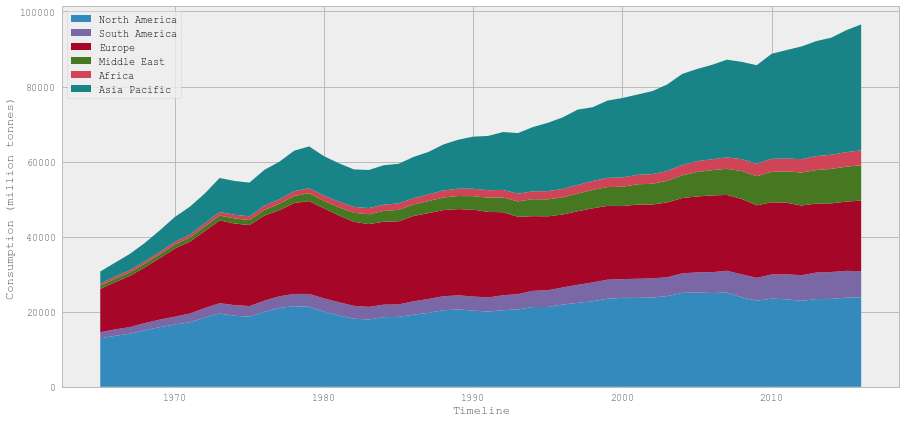

In [29]:
temp_oc = oc.drop('location', 1)
i_oc = list(temp_oc.columns.values)
j_oc = temp_oc.values.tolist()
i_oc = [int(x) if type(x) is str else None for x in i_oc]
i_oc
plt.figure(figsize=(15,7))
plt.stackplot(i_oc,j_oc, labels=['North America','South America','Europe','Middle East','Africa','Asia Pacific'])
plt.xlabel('Timeline')
plt.ylabel('Consumption (million tonnes)')
plt.legend(loc='upper left')

# Natural Gas

In [30]:
Gas_Production = pd.read_csv('Natural Gas Production(Bcf).csv')
Gas_Consumption = pd.read_csv('Natural Gas Consumption(Bcf).csv')

In [31]:
Gas_Production.head()
Gas_Consumption.head()

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
0,US,41.862236,45.075077,47.639342,50.907273,54.948603,57.916126,59.708093,60.386478,60.409214,58.145570,53.527652,54.498623,53.481044,53.773912,55.454140,54.309544,53.161255,49.317959,46.123047,49.045156,47.345049,44.441907,47.152901,49.261161,52.380814,52.530290,53.594704,55.268383,56.958471,58.211227,60.840792,61.773443,62.294088,60.947825,61.383975,63.751697,60.927737,63.087729,61.031512,61.209142,60.313518,59.449510,63.298063,63.598383,62.767337,65.991225,67.061438,69.777287,71.657729,72.858562,74.811740,75.129008,0.004241,0.021776,0.219774
1,Canada,2.201012,2.409675,2.558889,2.841683,3.184447,3.518028,3.754965,4.212029,4.491574,4.540272,4.688626,4.717306,4.961468,5.008877,5.085311,5.039576,4.903417,5.192707,4.951793,5.481492,5.765540,5.548707,5.615902,6.163846,6.681573,6.476622,6.521380,6.894001,7.334720,7.593204,7.978298,8.353703,8.434119,8.071984,8.452473,8.944056,8.532932,8.724076,9.448704,9.173263,9.462617,9.379661,9.307620,9.270002,9.185102,9.195851,9.757499,9.669502,10.052207,10.084871,9.913503,9.634615,-0.028132,0.004666,0.028184
2,Mexico,0.809018,0.851626,0.732155,0.782238,0.970206,0.989971,1.025546,1.094243,1.215009,1.278594,1.299598,1.273452,1.347017,1.693962,2.057751,2.221100,2.411525,2.630981,2.698759,2.725614,2.783531,2.473922,2.512545,2.529448,2.464409,2.663502,2.824594,2.814735,2.876857,3.052588,3.041855,3.199909,3.447674,3.790996,3.742390,3.937576,4.092065,4.498104,4.963127,5.236096,5.892100,6.439578,6.134770,6.395926,6.989604,7.010746,7.412272,7.709937,8.057210,8.400206,8.429242,8.639820,0.024982,0.036458,0.025274
3,Total North America,44.872266,48.336377,50.930386,54.531195,59.103256,62.424126,64.488604,65.692750,66.115796,63.964437,59.515876,60.489380,59.789529,60.476751,62.597202,61.570220,60.476197,57.141646,53.773599,57.252261,55.894119,52.464537,55.281348,57.954455,61.526796,61.670414,62.940678,64.977119,67.170048,68.857019,71.860945,73.327054,74.175880,72.810804,73.578838,76.633328,73.552734,76.309908,75.443343,75.618502,75.668235,75.268749,78.740453,79.264311,78.942043,82.197822,84.231209,87.156726,89.767146,91.343638,93.154484,93.403444,0.002673,0.021008,0.273233
4,Argentina,0.410231,0.444309,0.464627,0.515890,0.515368,0.582450,0.603684,0.689811,0.770443,0.759350,0.844223,0.890953,0.920808,0.896349,0.975981,1.085960,1.127337,1.216309,1.350814,1.440869,1.484768,1.705805,1.726235,2.006667,2.146044,2.024856,2.155186,2.214607,2.178535,2.270851,2.513099,2.765895,2.825856,2.933994,3.198376,3.348172,3.141577,3.090781,3.407979,3.657866,3.908801,4.044254,4.249370,4.285039,4.077626,4.191514,4.359258,4.509092,4.520923,4.563757,4.662143,4.786407,0.026654,0.017781,0.014002


In [32]:
print(Gas_Production.shape)
print(Gas_Consumption.shape)

(62, 51)
(80, 56)


In [33]:
Gas_Production.describe()
Gas_Consumption.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,2.557072,2.781333,2.984258,3.243116,3.568729,3.885771,4.149237,4.369176,4.593073,4.683781,4.680886,4.937860,5.102667,5.314484,5.639155,5.675266,5.750093,5.763930,5.836907,6.294524,6.027684,6.084686,6.395371,6.676661,6.996675,7.193542,7.384825,7.399569,7.498317,7.547989,7.814831,8.170805,8.187257,8.318551,8.537066,8.859067,9.027901,9.285645,9.538646,9.857902,10.171658,10.473694,10.902417,11.156807,10.897190,11.711665,11.925811,12.229751,12.432709,12.494900,12.786533,12.981494,0.025151,0.024923,0.037975
std,10.221075,11.077339,11.812723,12.757519,13.938674,15.002959,15.848512,16.494690,17.109310,17.215172,16.953211,17.779618,18.220871,18.869242,19.889383,19.935605,20.141127,20.089737,20.277008,21.814554,21.376010,21.437508,22.545742,23.489700,24.561463,25.206242,25.812651,25.737404,26.081721,26.087983,26.920287,28.035193,27.960155,28.315213,28.986087,30.011871,30.394822,31.213665,31.921694,32.845543,33.758921,34.642463,35.986636,36.716447,35.751448,38.350478,38.988472,39.907754,40.528171,40.686621,41.575863,42.178894,0.054411,0.046424,0.123386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000529,0.000901,0.000693,0.000923,0.000970,0.000866,0.000786,0.030934,0.031492,0.037650,0.044005,0.038408,0.046228,0.047996,0.042412,0.055495,0.061950,0.063833,0.061598,0.062526,-0.125077,-0.083759,0.000183
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.003559,0.006450,0.010399,0.005515,0.012363,0.016233,0.032004,0.036873,0.061922,0.068017,0.075797,0.073317,0.095532,0.105030,0.108924,0.166887,0.137872,0.175961,0.219843,0.252148,0.267075,0.258747,0.261611,0.279875,0.320832,0.363860,0.397352,0.411572,0.406084,0.465865,0.470151,0.469203,0.486536,0.505802,0.531047,0.626543,0.627702,0.563324,0.556145,0.498773,0.550048,0.587601,0.611459,0.675902,0.705338,0.729935,0.765993,0.003787,-0.007841,0.002241
50%,0.034723,0.038378,0.046731,0.061109,0.076219,0.097828,0.120208,0.128651,0.167382,0.174155,0.193795,0.187187,0.249191,0.279163,0.339877,0.366722,0.356382,0.411598,0.432502,0.453495,0.702421,0.712633,0.785856,0.817066,0.974105,0.920275,0.938983,0.970212,1.011238,0.963140,1.015703,1.174454,1.296483,1.338861,1.346795,1.433230,1.458933,1.465127,1.548255,1.728914,1.798191,1.990111,2.121948,2.065525,2.014876,2.545945,2.278004,2.539186,2.803400,2.543703,2.785623,2.795327,0.024758,0.021776,0.008177
75%,0.168802,0.188866,0.225648,0.293646,0.438185,0.558857,0.603684,0.644974,0.767885,0.759350,0.884660,0.964716,1.181370,1.242410,1.450442,1.428561,1.440215,1.622539,1.776376,1.756084,2.335106,2.456043,2.552756,2.567055,2.695883,2.690557,2.771188,2.912090,2.566993,2.832911,3.115722,3.340249,3.408640,3.691824,3.724941,3.807344,3.952069,3.928101,4.023348,4.075503,4.273480,4.227824,4.598152,5.218818,4.715086,5.441436,5.551637,5.701485,5.028856,4.720811,4.897244,5.000532,0.048721,0.051780,0.014628
max,62.222083,67.679105,72.616943,78.915814,86.839066

In [34]:
Gas_Production = Gas_Production.dropna(how='all')
Gas_Production = Gas_Production.dropna(axis=1, how='all')
Gas_Consumption = Gas_Consumption.dropna(how='all')
Gas_Consumption = Gas_Consumption.dropna(axis=1, how='all')
# Gas_Production = Gas_Production.fillna(0)

In [35]:
print(Gas_Production.isnull().sum(),Gas_Consumption.isnull().sum())

location                         0
1970                             6
1971                             6
1972                             6
1973                             6
1974                             6
1975                             6
1976                             6
1977                             6
1978                             6
1979                             6
1980                             6
1981                             6
1982                             6
1983                             6
1984                             6
1985                             1
1986                             1
1987                             1
1988                             1
1989                             1
1990                             1
1991                             1
1992                             1
1993                             1
1994                             1
1995                             1
1996                             1
1997                

# Coal

In [36]:
Coal_Production = pd.read_csv('Coal Production Mtoe.csv')
Coal_Consumption = pd.read_csv('Coal Consumption Mtoe.csv')

In [37]:
Coal_Production.head()
Coal_Consumption.head()

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
0,US,291.826413,306.000469,300.221450,310.727834,312.009560,309.060907,292.275041,304.333189,326.876050,319.099158,319.096840,342.312730,350.831094,346.886655,378.991192,388.648249,400.862912,386.097347,400.533201,430.172438,440.448977,434.954889,453.805332,474.919074,480.549919,483.142275,478.582034,481.878163,499.837322,501.710028,506.227405,529.239330,540.415267,545.715569,544.878943,568.994534,552.230264,551.971238,562.477924,566.138591,574.463220,565.658917,573.276900,564.153923,496.210019,525.007162,495.367824,437.924130,454.565905,453.532697,391.824933,358.430858,-0.087726,-0.037539,0.096043
1,Canada,15.476000,15.172000,15.032000,16.331000,15.767000,16.928000,16.090000,15.183000,15.637000,15.888000,15.457000,18.300000,23.384000,19.228000,18.207000,22.174668,22.641206,23.924740,25.031408,27.882321,26.800564,24.839472,26.696857,28.668840,28.608627,27.136978,26.267937,26.759172,23.758360,25.190814,26.331351,26.881413,28.103755,30.054576,28.901189,30.587752,31.796432,31.992333,31.925695,29.996919,30.051161,29.163896,30.286448,29.399040,23.485383,24.765573,21.762301,21.049943,20.765479,19.731311,19.645563,18.676923,-0.051903,-0.041614,0.005005
2,Mexico,0.689787,0.735765,0.902790,0.946379,0.959325,1.075881,1.350697,1.492835,1.600387,1.768057,2.030811,1.558469,2.241617,2.337179,2.296049,2.324854,2.054935,2.460973,2.801734,2.809711,3.045715,3.358340,3.247874,3.073994,3.402694,3.374128,3.263543,3.300301,3.722485,4.498567,5.009339,5.743742,5.749283,5.876851,5.980009,6.550898,7.194633,12.046930,8.883781,9.090258,11.472874,12.312836,11.314166,10.107076,10.296341,12.735920,14.731474,12.834567,12.745194,12.720451,12.695654,9.814115,-0.229083,0.010179,0.002630
3,Total North America,307.992200,321.908233,316.156240,328.005213,328.735884,327.064788,309.715738,321.009024,344.113437,336.755215,336.584651,362.171200,376.456711,368.451834,399.494242,413.147772,425.559052,412.483059,428.366343,460.864470,470.295255,463.152702,483.750063,506.661908,512.561240,513.653381,508.113513,511.937636,527.318166,531.399409,537.568095,561.864486,574.268305,581.646997,579.760141,606.133184,591.221329,596.010501,603.287400,605.225768,615.987255,607.135649,614.877514,603.660039,529.991743,562.508655,531.861598,471.808640,488.076579,485.984460,424.166150,386.921896,-0.090298,-0.036623,0.103677
4,Argentina,0.796140,0.833482,0.817108,0.656726,0.875198,0.979747,0.807176,0.720065,0.760040,0.974360,1.052018,1.073874,0.850587,1.215172,0.960158,0.934129,0.848412,0.842520,0.766964,0.516481,0.601080,0.894895,0.993465,1.031213,1.032590,0.939286,0.734004,0.650001,0.768750,1.083333,0.971280,0.912723,0.846019,0.730544,0.735789,0.614249,0.664552,0.560940,0.680695,1.074224,1.127400,1.055113,1.220322,1.391916,0.954877,1.269327,1.547909,1.309561,1.252564,1.489000,1.359770,1.057206,-0.224636,0.018917,0.000283


In [38]:
print(Coal_Production.shape)
print(Coal_Consumption.shape)

(46, 40)
(80, 56)


In [39]:
Coal_Production.describe()
Coal_Consumption.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,58.478221,59.159708,58.209380,59.090340,60.936055,61.781618,61.407076,62.118100,63.995453,64.032364,65.268639,67.670510,69.662596,70.432392,73.726133,75.530643,76.601776,77.413913,79.794569,83.284457,78.884064,79.783163,82.960011,85.432602,86.295551,85.306608,84.366174,84.095075,84.508382,84.984966,85.439512,87.597381,87.730466,87.080769,87.535475,90.558954,91.997575,95.537180,103.849519,110.976225,119.023794,125.083868,132.158070,133.989442,132.005065,138.062194,144.576742,144.960313,147.606577,147.699616,143.721052,141.721463,-0.024662,0.015646,0.037975
std,198.235444,200.036755,196.915966,199.588586,205.158753,207.040999,205.512556,207.663637,213.602698,213.434197,217.180578,224.847423,231.024543,233.662519,244.186155,249.352526,252.169252,254.588589,262.180988,273.053507,270.134564,273.276397,284.259607,292.808467,296.159315,292.968818,290.482202,290.361549,293.200754,296.281118,298.309456,306.757875,307.005735,305.119677,307.715492,318.134050,324.139991,338.756201,372.191090,402.939336,439.785726,465.787483,496.062671,504.065658,505.139154,527.744212,558.076936,562.409316,574.219659,574.925459,562.580476,557.099556,0.134206,0.081406,0.149276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.664135,-0.198139,0.000000
25%,0.127500,0.145000,0.114750,0.116750,0.127000,0.130500,0.137496,0.145719,0.242029,0.193235,0.213582,0.163882,0.226527,0.181746,0.225014,0.319412,0.365250,0.628315,0.678258,0.768189,0.837608,0.920673,0.950059,0.991996,0.911257,0.875383,0.952165,0.850496,1.030904,1.060461,0.958849,0.957344,0.899562,0.930006,0.896823,0.931057,0.762812,0.801467,0.845211,0.991086,1.024434,0.968556,1.127740,1.076439,0.985785,1.104899,1.382914,1.234553,1.343649,1.465228,1.311908,1.138204,-0.067423,-0.021877,0.000305
50%,2.607162,2.548146,2.611500,2.653500,2.517734,2.393107,2.235500,2.271244,2.368750,2.383068,2.354220,2.929779,3.138316,3.343689,3.336190,3.754062,3.422816,3.458655,3.626409,4.153614,3.691474,3.931000,4.926000,5.040828,5.000955,5.265907,5.260342,4.887930,5.444466,5.197000,5.424908,6.220646,6.630100,5.842958,5.738703,6.254907,7.194633,6.585626,6.911644,7.384327,6.895000,7.298000,7.480486,7.551100,7.158020,6.897000,7.720000,7.603400,7.548400,7.614600,6.747310,6.697788,-0.002306,0.000000,0.001795
75%,15.949816,15.750689,15.564569,16.677833,16.139316,16.428979,16.594432,16.016834,16.459045,16.831044,16.743681,19.179261,23.326515,20.585657,20.210682,23.596189,24.080904,25.180884,25.343556,25.818080,29.227405,28.648717,29.678656,30.614636,30.212195,29.071768,27.031464,25.171504,24.143380,22.709983,21.739331,21.254212,21.202410,21.408150,20.243297,22.051950,21.742500,22.095250,24.043855,24.478163,25.625617,28.604117,30.712624,30.552824

In [40]:
Coal_Production = Coal_Production.dropna(how='all')
Coal_Production = Coal_Production.dropna(axis=1, how='all')
Coal_Consumption = Coal_Consumption.dropna(how='all')
Coal_Consumption = Coal_Consumption.dropna(axis=1, how='all')
# Coal_Production = Coal_Production.fillna(0)

In [41]:
print(Coal_Production.isnull().sum(),Coal_Consumption.isnull().sum())

location                         0
1981                             5
1982                             5
1983                             5
1984                             5
1985                             2
1986                             2
1987                             2
1988                             2
1989                             2
1990                             2
1991                             2
1992                             2
1993                             2
1994                             2
1995                             2
1996                             2
1997                             2
1998                             2
1999                             2
2000                             2
2001                             2
2002                             2
2003                             2
2004                             2
2005                             2
2006                             2
2007                             1
2008                

# Prediction Algorithms Implementation

Now that we have performed an analysis of major resources Oil, Gas and Coal. We will move to the predcition models required, how are they different from one another and which prediction model will play the major role for our dataset.

# Decision Tree
The first would be trying decision tree to predict the increase or decrease of consumotion ahead. We would be suing Scikit Learn library to implement this algorithm. and thus need to import the DecisionTreeClasifier from sklearn.

In [42]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [43]:
dt = Primary_Consumption
dt['diff'] = dt['2016']-dt['2015']
dt['Surge'] = np.where(dt['diff']>0, 'increase', 'decrease')
dt

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016,diff,Surge
0,US,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.004147,-0.003144,0.171183,-3.227962,decrease
1,Canada,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.003332,0.001571,0.024835,1.992968,increase
2,Mexico,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,-0.014853,0.011959,0.014050,-2.295030,decrease
3,Total North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477,-0.003993,-0.001651,0.210067,-3.530024,decrease
4,Argentina,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,-0.001167,0.025380,0.006693,0.139245,increase
5,Brazil,22.047897,24.032503,24.902351,28.518724,31.118106,36.669912,40.116862,46.187830,55.068698,60.115390,63.480737,69.739302,74.704544,82.607416,89.564391,91.345664,88.865033,93.452459,95.563471,102.920721,109.912903,117.746445,121.257045,125.912097,128.559457,125.977741,130.858838,137.089629,143.101989,150.428989,157.854669,166.703246,175.745439,181.941388,184.930494,187.879630,185.518745,190.535541,194.210179,204.412155,211.268536,216.779236,231.781644,243.88917

In [44]:
print ("Dataset Length::", len(dt))
print ("Dataset Shape::", dt.shape)
dt = dt.fillna(0)

Dataset Length:: 80
Dataset Shape:: (80, 58)


In [45]:
print ("Dataset:: ")
dt.head()

Dataset:: 


,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016,diff,Surge
0,US,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.004147,-0.003144,0.171183,-3.227962,decrease
1,Canada,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.003332,0.001571,0.024835,1.992968,increase
2,Mexico,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,-0.014853,0.011959,0.014050,-2.295030,decrease
3,Total North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477,-0.003993,-0.001651,0.210067,-3.530024,decrease
4,Argentina,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,-0.001167,0.025380,0.006693,0.139245,increase


Now that we have our dataset ready for prediction, we start with splitting it into the testing and training datasets.

In [46]:
X = dt.values[:, 1:53]
Y = dt.values[:,57]

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

We have decided to go through both 'gini' and 'entropy' criterion for this project.

In [48]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [49]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [50]:
y_pred = clf_gini.predict(X_test)
y_pred

array(['decrease', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'increase', 'decrease', 'increase',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'decrease', 'increase', 'increase',
       'increase', 'increase', 'decrease', 'decrease'], dtype=object)

In [51]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['increase', 'decrease', 'increase', 'decrease', 'decrease',
       'increase', 'increase', 'decrease', 'increase', 'increase',
       'increase', 'increase', 'increase', 'increase', 'decrease',
       'increase', 'increase', 'increase', 'increase', 'increase',
       'increase', 'increase', 'decrease', 'increase'], dtype=object)

The following is the accuracy result for the decision tree algorithm. Looks like the entropy criterion has suited to our dataset majorly.

In [52]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  66.6666666667


In [53]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  70.8333333333


# K Nearest Neighbour Algorithm
With a 70.83% of accuracy gained in the previous algorithm we move to the K Nearest Neighbour Algorithm with more accuracy hopes.

In [54]:
#dt.to_csv('KNNexample.csv')

In [55]:
import unicodecsv
import random
import operator
import math

#getdata() function definition
def getdata(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.reader(f)
        return list(reader)

#random train test data split function definition
def shuffle(i_data):
    random.shuffle(i_data)
    train_data = i_data[:int(0.7*80)]
    test_data = i_data[int(0.3*80):]
    return train_data, test_data

def euclideanDist(x, xi):
    d = 0.0
    for i in range(len(x)-1):
        d += pow((float(x[i])-float(xi[i])),2)  #euclidean distance
    d = math.sqrt(d)
    return d

#KNN prediction and model training
def knn_predict(test_data, train_data, k_value):
    for i in test_data:
        eu_Distance =[]
        knn = []
        good = 0

        bad = 0
        for j in train_data:
            eu_dist = euclideanDist(i, j)
            eu_Distance.append((j[52], eu_dist))
            eu_Distance.sort(key = operator.itemgetter(1))
            knn = eu_Distance[:k_value]
            for k in knn:
                if k[0] =='increase':
                    good += 1
                else:
                    bad +=1
        if good > bad:
            i.append('increase')
        elif good < bad:
            i.append('decrease')
        else:
            i.append('NaN')

#Accuracy calculation function
def accuracy(test_data):
    correct = 0
    for i in test_data:
        if i[52] == i[53]:
            correct += 1
    accuracy = float(correct)/len(test_data) *100  #accuracy 
    return accuracy

dataset = getdata('KNNexample.csv')  #getdata function call with csv file as parameter
train_dataset, test_dataset = shuffle(dataset) #train test data split
K = 9                                          # Assumed K value
knn_predict(test_dataset, train_dataset, K)   
# print (test_dataset)
print ("Accuracy : ",accuracy(test_dataset))

Accuracy :  71.9298245614035


An increase in the accuracy score by a little amount is not bad.

# BUILDING RANDOM FOREST CLASSIFIER
Applying the extension of decision tree to random forest would make sure that we get a more accurate prediction value.

In [56]:
import seaborn as sns
import scipy as sp
import sklearn
import sklearn.cross_validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

In [57]:
Primary_Consumption

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016,diff,Surge
0,US,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.004147,-0.003144,0.171183,-3.227962,decrease
1,Canada,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.003332,0.001571,0.024835,1.992968,increase
2,Mexico,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,-0.014853,0.011959,0.014050,-2.295030,decrease
3,Total North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477,-0.003993,-0.001651,0.210067,-3.530024,decrease
4,Argentina,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,-0.001167,0.025380,0.006693,0.139245,increase
5,Brazil,22.047897,24.032503,24.902351,28.518724,31.118106,36.669912,40.116862,46.187830,55.068698,60.115390,63.480737,69.739302,74.704544,82.607416,89.564391,91.345664,88.865033,93.452459,95.563471,102.920721,109.912903,117.746445,121.257045,125.912097,128.559457,125.977741,130.858838,137.089629,143.101989,150.428989,157.854669,166.703246,175.745439,181.941388,184.930494,187.879630,185.518745,190.535541,194.210179,204.412155,211.268536,216.779236,231.781644,243.88917

In [58]:
random_forest_dt = Primary_Consumption
random_forest_dt = random_forest_dt.drop('Growth rate per annum 2016', 1)
random_forest_dt = random_forest_dt.drop('Share 2016', 1)
random_forest_dt = random_forest_dt.drop('diff',1)
random_forest_dt = random_forest_dt.drop('Surge',1)
# random_forest_dt = random_forest_dt.drop('trend',1)

In [59]:
random_forest_dt = random_forest_dt[~random_forest_dt.location.str.startswith(('Total'))]
random_forest_dt = random_forest_dt.drop('location',1)
random_forest_dt = random_forest_dt.dropna()

In [60]:
random_forest_dt

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2005-15
0,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.003144
1,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.001571
2,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,0.011959
4,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,0.025380
5,22.047897,24.032503,24.902351,28.518724,31.118106,36.669912,40.116862,46.187830,55.068698,60.115390,63.480737,69.739302,74.704544,82.607416,89.564391,91.345664,88.865033,93.452459,95.563471,102.920721,109.912903,117.746445,121.257045,125.912097,128.559457,125.977741,130.858838,137.089629,143.101989,150.428989,157.854669,166.703246,175.745439,181.941388,184.930494,187.879630,185.518745,190.535541,194.210179,204.412155,211.268536,216.779236,231.781644,243.889171,242.951052,267.565485,279.714210,284.824093,296.835436,304.903802,302.574649,297.818303,0.036573
6,6.123682,6.558661,6.670998,6.648324,7.156251,7.545917,8.057934,8.287898,8.008640,7.906509,7.129940,7.482718,7.732502,8.206191,8.467970,8.736759,8.960990,8.174600,8.357865,8.772481,9.039089,9.431191,9.884046,11.071654,12.281852,12.960725,14.208027,15.684572,16.586377,17.459606,18.834253,20.032199,22.890445,22.942008,23.748275,24.987568,25.271634,26.173462,25.987184,27.320959,28.460532,30.605273,31.499128,31.222457,30.942236,30.364824,33.656333,34.051367,34.365944,35.386230,35.937778,36.770014,0.023601
7,7.492866,8.175843,8.716423,9.154347,9.317309,10.122236,9.846950,11.085174,11.037118,12.368908,12.617591,13.144904,13.434729,14.351998,15.252949,15.478648,15.856434,16.576000,17.442179,17.893974,18.594923,19.175273,20.853978,20.840898,21.916027,20.431091,21.236356,22.289601,24.540195,26.331647,26.745276,27.396878,28.254195,28

In [110]:
msk = np.random.rand(len(random_forest_dt)) < 0.7
ener_train, ener_test = random_forest_dt[msk].copy(deep = True), random_forest_dt[~msk].copy(deep = True)

In [111]:
XX_ener_train = ener_train.drop('2016', axis = 1).reset_index().drop('index', axis = 1)
XX_ener_test = ener_test.drop('2016', axis = 1).reset_index().drop('index', axis = 1)

YY_ener_train = ener_train['2016']
YY_ener_test = ener_test['2016']

In [112]:
print (XX_ener_train.shape, XX_ener_test.shape)

(48, 52) (15, 52)


In [113]:
scores = pd.DataFrame()
for n in range(1,41):
    RF = RandomForestRegressor(n_estimators=n, max_depth=None, min_samples_split=2, random_state=0)
    score = cross_val_score(RF, XX_ener_train, YY_ener_train,cv=10)
    scores[n] = score

Applying the Random Forest function above with 2 minimum sample splits have maximised our analysis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



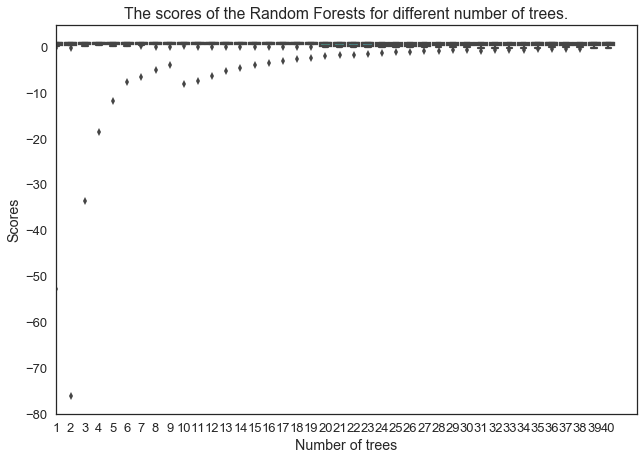

In [114]:
sns.set_context("talk")
sns.set_style("white")

sns.boxplot(scores)
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.title("The scores of the Random Forests for different number of trees.")
plt.xlim(0,41)
plt.show()

Choose number of trees as 20.

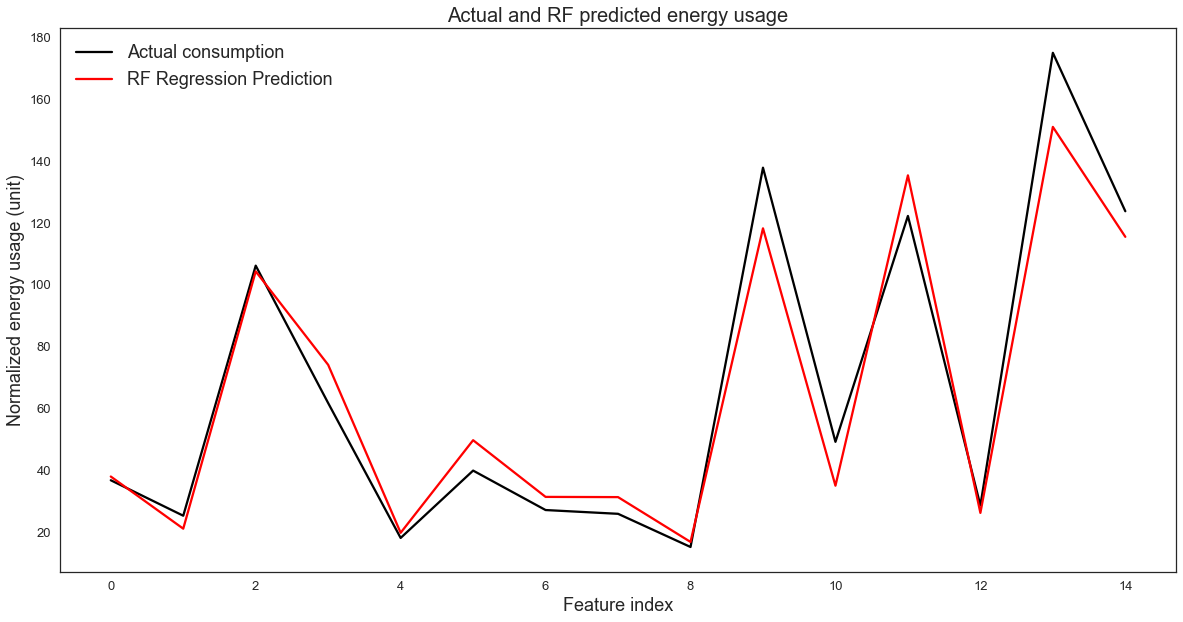

In [115]:
RF_e = RandomForestRegressor(n_estimators=20, max_depth=None, min_samples_split=2, random_state=1)
RF_e.fit(XX_ener_train,YY_ener_train)
YY_ener_pred=RF_e.predict(XX_ener_test)

fig,ax = plt.subplots(1, 1,figsize=(20,10))
line1, =plt.plot(XX_ener_test.index, YY_ener_test, label='Actual consumption', color='k')
line2, =plt.plot(XX_ener_test.index, YY_ener_pred, label='RF Regression Prediction', color='r')
plt.xlabel('Feature index',fontsize=18)
plt.ylabel('Normalized energy usage (unit)',fontsize=18)
plt.title('Actual and RF predicted energy usage',fontsize=20)
plt.legend([line1, line2], ['Actual consumption', 'RF Regression Prediction'],fontsize=18)
plt.show()

In [116]:
print (RF_e.score(XX_ener_test,YY_ener_test))

0.954505347149


And there we have an increase of accuracy to 95.45%. This accuracy can be viewed visually as below.

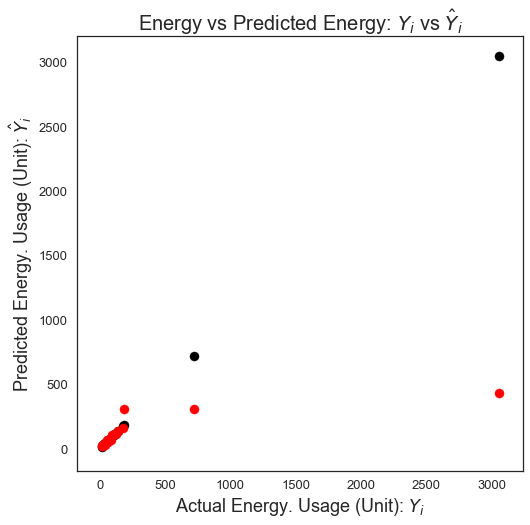

In [91]:
#Plot actual vs. prediced usage.
fig = plt.figure(figsize=(8,8))
plt.scatter(YY_ener_test, YY_ener_test, c='k')
plt.scatter(YY_ener_test, YY_ener_pred, c='r')
plt.xlabel('Actual Energy. Usage (Unit): $Y_i$',fontsize=18)
plt.ylabel("Predicted Energy. Usage (Unit): $\hat{Y}_i$",fontsize=18)
plt.title("Energy vs Predicted Energy: $Y_i$ vs $\hat{Y}_i$",fontsize=20)
plt.show()

# GAUSSIAN NAIVE BAYES CLASSIFIER 
The Gaussian Naive Bayes will be the another predictive model which will be used. Here we will be predicting the growth rate of 10 years period.

In [69]:
#Consumption_num_feature = Primary_Consumption['1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

In [70]:
Primary_Consumption['trend'] = np.where(Primary_Consumption['Growth rate per annum 2005-15']>0, 1, 0)
Primary_Consumption = Primary_Consumption.fillna(0)
Primary_Consumption

,location,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Growth rate per annum 2016,Growth rate per annum 2005-15,Share 2016,diff,Surge,trend
0,US,1286.498403,1359.772077,1406.805659,1492.337080,1573.001744,1626.708389,1658.989689,1741.544437,1810.675388,1763.787102,1716.421285,1808.277200,1853.144045,1851.810117,1877.537010,1811.635322,1759.461924,1682.698480,1671.511721,1760.879198,1755.366810,1761.428274,1822.221416,1906.393263,1960.237494,1965.791954,1963.163957,1994.673221,2036.658912,2074.352731,2119.021613,2189.486399,2206.656467,2220.597681,2257.840356,2309.938142,2256.382143,2290.923084,2299.031693,2345.849173,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,2272.679676,-0.004147,-0.003144,0.171183,-3.227962,decrease,0
1,Canada,116.315963,123.485919,129.558620,138.367721,146.183700,156.647647,160.979000,172.151000,182.770000,189.064000,187.001000,197.390976,207.072888,210.588143,212.927340,218.013826,211.990676,215.108742,213.261192,227.342125,234.442793,234.709251,242.674831,253.052070,256.228303,251.416963,251.754092,258.318872,264.246307,274.023638,280.833670,291.004131,292.494071,286.595771,294.135305,303.190680,296.949214,305.260181,312.347014,315.633760,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,329.710735,0.003332,0.001571,0.024835,1.992968,increase,1
2,Mexico,24.449343,25.718662,26.001361,28.397763,31.261260,33.280680,34.870418,38.374460,41.277933,45.975416,49.621992,52.915695,55.824642,63.448542,70.399867,76.474449,84.297460,88.163637,87.305007,91.926418,95.758752,92.441125,95.500305,96.019096,100.834587,106.311660,110.805726,112.658963,113.606710,121.261496,117.649474,122.734566,127.393899,134.352238,135.921524,142.205252,141.710926,145.911410,148.474183,155.830036,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,186.528066,-0.014853,0.011959,0.014050,-2.295030,decrease,1
3,Total North America,1427.263710,1508.976658,1562.365640,1659.102563,1750.446704,1816.636717,1854.839107,1952.069897,2034.723321,1998.826518,1953.044276,2058.583872,2116.041576,2125.846802,2160.864217,2106.123596,2055.750059,1985.970859,1972.077919,2080.147741,2085.568355,2088.578650,2160.396551,2255.464430,2317.300385,2323.520577,2325.723775,2365.651055,2414.511929,2469.637865,2517.504757,2603.225096,2626.544437,2641.545690,2687.897185,2755.334074,2695.042282,2742.094676,2759.852890,2817.312970,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,2788.918477,-0.003993,-0.001651,0.210067,-3.530024,decrease,0
4,Argentina,26.935816,28.001170,28.723704,29.599541,30.669098,28.873684,30.391040,31.140949,32.296039,33.264565,33.029666,34.362851,35.626654,36.476593,38.997380,39.256606,37.690976,38.081518,40.223522,40.169690,39.151373,44.396352,46.507739,47.683228,46.054572,45.261140,46.493837,48.804324,49.359339,50.848023,52.764172,55.498911,57.681285,58.822396,58.444201,61.483742,60.703953,58.338301,61.853523,64.783298,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,88.852686,-0.001167,0.025380,0.006693,0.139245,increase,1
5,Brazil,22.047897,24.032503,24.902351,28.518724,31.118106,36.669912,40.116862,46.187830,55.068698,60.115390,63.480737,69.739302,74.704544,82.607416,89.564391,91.345664,88.865033,93.452459,95.563471,102.920721,109.912903,117.746445,121.257045,125.912097,128.559457,125.977741,130.858838,137.089629,143.101989,150.428989,157.854669,166.703246,175.745439,181.941388,184.930494,187.879630,185.518745,190.535541,194.210179,204.412155,211.268536,216.779236,231.

In [71]:
Consumption_num_feature=Primary_Consumption.iloc[:,[41,42,43,44,45,46,47,48,49,50,51]]
Consumption_num_feature

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638
1,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767
2,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096
3,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501
4,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441
5,211.268536,216.779236,231.781644,243.889171,242.951052,267.565485,279.714210,284.824093,296.835436,304.903802,302.574649
6,28.460532,30.605273,31.499128,31.222457,30.942236,30.364824,33.656333,34.051367,34.365944,35.386230,35.937778
7,27.219012,30.700060,30.841522,34.008885,31.954088,34.238777,35.700021,38.375223,38.237170,40.313020,41.033961
8,9.750557,10.337958,10.984251,11.694910,11.465530,12.731241,13.516053,14.270967,14.717657,15.481931,15.456214
9,13.562209,13.752137,15.068991,16.391416,16.727883,18.518195,20.263427,21.158785,21.703716,22.442430,23.718548


In [72]:
Consumption_rev = Primary_Consumption.iloc[:,[41,42,43,44,45,46,47,48,49,50,51,58]]
Consumption_rev

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,trend
0,2348.706245,2331.641965,2370.247533,2318.845057,2205.071333,2284.068910,2264.549096,2209.262071,2270.628033,2296.537509,2275.907638,0
1,322.613887,319.511706,325.391598,326.015131,310.484782,315.466163,327.617092,326.529034,336.108346,334.285343,327.717767,1
2,167.658384,172.922877,170.829192,174.344666,174.136965,178.259118,186.467559,188.522196,189.141712,190.388066,188.823096,1
3,2838.978516,2824.076548,2866.468322,2819.204854,2689.693080,2777.794191,2778.633748,2724.313301,2795.878091,2821.210917,2792.448501,0
4,69.046177,72.507974,75.573923,76.818343,74.812606,79.695431,81.354529,83.448995,86.502965,86.733009,88.713441,1
5,211.268536,216.779236,231.781644,243.889171,242.951052,267.565485,279.714210,284.824093,296.835436,304.903802,302.574649,1
6,28.460532,30.605273,31.499128,31.222457,30.942236,30.364824,33.656333,34.051367,34.365944,35.386230,35.937778,1
7,27.219012,30.700060,30.841522,34.008885,31.954088,34.238777,35.700021,38.375223,38.237170,40.313020,41.033961,1
8,9.750557,10.337958,10.984251,11.694910,11.465530,12.731241,13.516053,14.270967,14.717657,15.481931,15.456214,1
9,13.562209,13.752137,15.068991,16.391416,16.727883,18.518195,20.263427,21.158785,21.703716,22.442430,23.718548,1


In [73]:
num_features = ['2005', '2006', '2007', '2008', '2009',
                '2010', '2011', '2012', '2013',
                '2014', '2015', ]
scaled_features = {}
for each in Consumption_num_feature:
    mean, std = Consumption_rev[each].mean(), Consumption_rev[each].std()
    scaled_features[each] = [mean, std]
    Consumption_rev.loc[:, each] = (Consumption_rev[each] - mean)/std


Consumption_rev

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,trend
0,1.416860,1.354256,1.328063,1.272600,1.217000,1.197163,1.147480,1.091423,1.103068,1.104547,1.079729,0
1,-0.064025,-0.073056,-0.075942,-0.078567,-0.085651,-0.092297,-0.089027,-0.092597,-0.090290,-0.093272,-0.099062,1
2,-0.177283,-0.177039,-0.182065,-0.181402,-0.179399,-0.182169,-0.179134,-0.179387,-0.180950,-0.181111,-0.183103,1
3,1.775204,1.703567,1.668770,1.611851,1.550209,1.520559,1.475663,1.415331,1.427082,1.424824,1.392272,0
4,-0.249360,-0.248269,-0.247468,-0.247526,-0.247691,-0.246729,-0.246237,-0.245466,-0.244266,-0.244385,-0.243676,1
5,-0.145408,-0.145930,-0.140215,-0.134250,-0.132085,-0.123672,-0.119607,-0.118824,-0.114517,-0.111207,-0.114275,1
6,-0.279024,-0.277993,-0.277730,-0.278441,-0.277855,-0.279042,-0.276687,-0.276531,-0.276428,-0.275729,-0.275609,1
7,-0.279932,-0.277926,-0.278181,-0.276551,-0.277159,-0.276504,-0.275382,-0.273812,-0.274040,-0.272721,-0.272526,1
8,-0.292699,-0.292370,-0.291815,-0.291681,-0.291246,-0.290592,-0.289544,-0.288971,-0.288548,-0.287879,-0.288002,1
9,-0.289913,-0.289948,-0.289011,-0.288496,-0.287628,-0.286801,-0.285236,-0.284639,-0.284239,-0.283630,-0.283003,1


In [74]:
features = Consumption_rev.values[:,:11]
target = Consumption_rev.values[:,11]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.54, random_state = 10)

In [75]:
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [76]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [77]:
accuracy_score(target_test, target_pred, normalize = True)

0.63636363636363635

We managed to grab an accuracy of 63.63% on the growth rate using the Naive Bayes classifier.

# Support Vector Regression
Support Vector Regression is the most frequently used algorithm in traditional machine learning. We have made an attempt to know how does this algorithm holds for our energy data.

In [78]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics


In [79]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
Consumption_scaled = scaled_df(Consumption_rev)

In [80]:
Consumption_predictor = Consumption_scaled.drop('trend', 1)

In [81]:
Consumption_target = Consumption_scaled['trend']

In [82]:
X = Consumption_predictor
#setting target
y = Consumption_target

In [83]:
#setting svm classifier
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.664285714286
Accuracy score using SVM is 0.625


Looks like an accuracy score of 62.5% and a mean score of 66.4% is what we managed out of it.